Provide an R or Python (with markdown) file for the independent samples t-test for Invisibility Cloak data set. 

In [27]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('Invisibility_Cloak.csv')
display(df.style.hide(axis="index"))

Participant,Cloak,Mischief
1,0,3
2,0,1
3,0,5
4,0,4
5,0,6
6,0,4
7,0,6
8,0,2
9,0,0
10,0,5


We want to run an independent-samples t-test for the given dataset, but before we can proceed, we will first need to verify if the required assumptions are met.

*Checking Assumptions*

**Assumption 1:** There is one dependent variable that is measured at the continous level.

<ins>Mischief</ins> is a variable that fulfills the said requirement. Thus, Assumption 1 is met.

**Assumption 2:** There is one independent variable that consists of two categorical, independent groups.

<ins>Cloak</ins> is an independent dichotomous variable with only the values '0' or '1'. Hence, Assumption 2 is met.

**Assumption 3:** The data should have independence of observations, meaning that there is no relationship between the observations in each group of the independent variable or between the groups themselves.

There is no <ins>participant</ins> that both has and does not have a cloak. This means that each participant is present to only one group, therefore Assumption 3 is met.

**Assumption 4 (Outliers):** There should be no significant outliers in the two groups of the independent variable in terms of the dependent variable.

C:\Users\Joel Mayol\AppData\Local\Temp\ipykernel_20924\3142149149.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


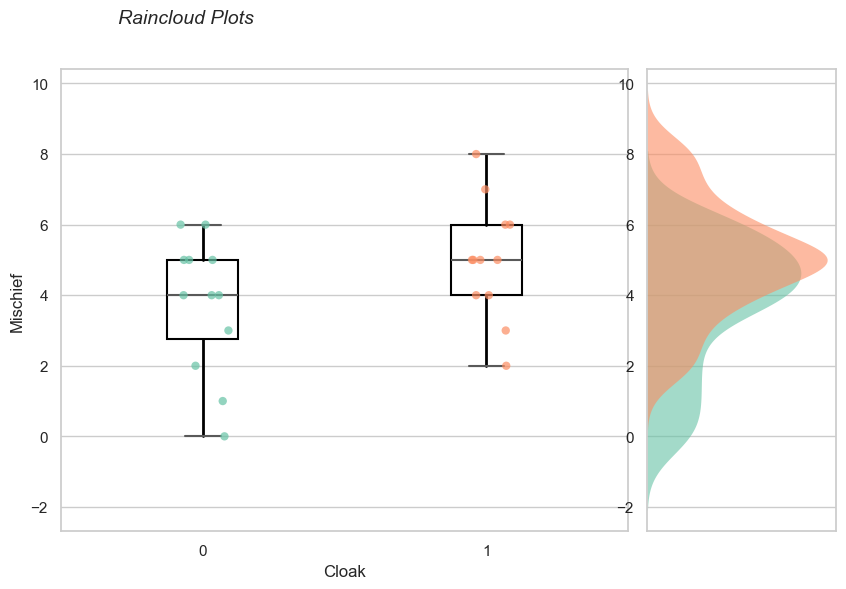

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

fig = plt.figure(figsize=(10, 6))
grid = plt.GridSpec(1, 2, width_ratios=[3, 1], wspace=0.05)
ax_main = fig.add_subplot(grid[0])

sns.boxplot(x="Cloak", y="Mischief", data=df, palette="Set2", width=0.25, showcaps=True, 
            boxprops={'facecolor':'None', 'edgecolor':'black'}, showfliers=True, 
            whiskerprops={'linewidth':2, 'color': 'black'}, ax=ax_main)
sns.stripplot(x="Cloak", y="Mischief", data=df, palette="Set2", jitter=True, dodge=True, 
              size=6, ax=ax_main, alpha=0.7)

ax_kde = fig.add_subplot(grid[1], sharey=ax_main)

for i, cloak_type in enumerate(df["Cloak"].unique()):
    subset = df[df['Cloak'] == cloak_type]
    sns.kdeplot(data=subset, y="Mischief", ax=ax_kde, bw_adjust=0.6, fill=True, 
                color=sns.color_palette("Set2")[i], alpha=0.6, linewidth=0)

ax_kde.get_xaxis().set_visible(False)
ax_kde.set_ylabel('')
plt.suptitle('Raincloud Plots', fontsize=14, style='italic', x=0.25)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Visual inspection of boxplots shows that there are no notable outliers in the two independent variable groups (Cloak) concerning the dependent variable (Mischief).

**Assumption 5 (Normality):** The dependent variable should be approximately normally distributed within each group of the independent variable.

In [31]:
without_cloak = df[df['Cloak'] == 0]['Mischief']
with_cloak = df[df['Cloak'] == 1]['Mischief']

from scipy import stats

stat_without_cloak, p_without_cloak = stats.shapiro(without_cloak)
stat_with_cloak, p_with_cloak = stats.shapiro(with_cloak)

shapiro_df = pd.DataFrame({
    'Mischief': ['Without a cloak', 'With a cloak'],
    'W': [stat_without_cloak, stat_with_cloak],
    'p': [p_without_cloak, p_with_cloak]
})

display(shapiro_df.style.hide(axis="index"))

Mischief,W,p
Without a cloak,0.912764,0.231446
With a cloak,0.972617,0.936188


Since p > 0.05 for both rows, then by the Shapiro-Wilk Test, the dependent variable (Mischief) is normally distributed for every group of Cloak.

**Assumption 6 (Homogeneity of Variances):** There should be an equality of variances between the groups with and without the Cloak on their number of Mischief. If p > 0.05, then this hypothesis is met.

In [4]:
stat_levene, p_levene = stats.levene(without_cloak, with_cloak)

levene_df = pd.DataFrame({
    'F': [stat_levene],
    'df': [1],
    'p': [p_levene]
})

shapiro_df['W'] = shapiro_df['W'].round(3)
shapiro_df['p'] = shapiro_df['p'].round(3)
levene_df['F'] = levene_df['F'].round(3)
levene_df['p'] = levene_df['p'].round(3)

display(levene_df.style.hide(axis="index"))

F,df,p
0.270000,1,0.609000


Since p > 0.05, then there is no significant difference between the variances. Hence, there is an equality of variances between the Cloak groups.

***INDEPENDENT SAMPLES T-TEST.***

In [24]:
t_statistic, p_value = stats.ttest_ind(without_cloak, with_cloak)

mean_without_cloak = np.mean(without_cloak)
mean_with_cloak = np.mean(with_cloak)

mean_difference = mean_without_cloak - mean_with_cloak

n1 = len(without_cloak)
n2 = len(with_cloak)
se_difference = np.sqrt((np.var(without_cloak, ddof=1) / n1) + (np.var(with_cloak, ddof=1) / n2))

df = n1 + n2 - 2

alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)
margin_of_error = critical_value * se_difference
ci_lower = (mean_difference - margin_of_error)
ci_upper = (mean_difference + margin_of_error)

results_df = pd.DataFrame({
    't': [t_statistic],
    'df': [df],
    'p': [p_value],
    'Mean Difference': [mean_difference],
    'SE Difference': [se_difference],
    '95% CI for Mean Difference (Lower; Upper)': [f'({ci_lower:.4f}; {ci_upper:.4f})']
})

results_df

,t,df,p,Mean Difference,SE Difference,95% CI for Mean Difference (Lower; Upper)
0,-1.713459,22,0.100686,-1.25,0.729518,(-2.7629; 0.2629)


This table presents the results of the independent samples t-test. The differences between the groups are not statistically significant at the .05 level, indicating that there is insufficient evidence to reject the null hypothesis.

***REPORT***

The purpose of this analysis was to investigate the impact of the variable "Cloak" on the "Mischief" scores among participants. The dataset consists of two groups: participants with a cloak (coded as '1') and participants without a cloak (coded as '0'). An independent samples t-test was conducted to determine whether there are significant differences in the mean Mischief scores between these two groups.

The dataset includes a total of 24 participants. Participants without a cloak (n = 12) had the following Mischief scores: 3, 1, 5, 4, 6, 4, 6, 2, 0, 5, 4, and 5. Participants with a cloak (n = 12) had the following scores: 4, 3, 6, 6, 8, 5, 5, 4, 2, 5, 7, and 5.

An independent samples t-test was performed to compare the Mischief scores between the two groups. The assumptions of normality and homogeneity of variances were assessed and found to be satisfactory.

The findings suggest that the presence of a cloak does not have a statistically significant effect on Mischief scores at the .05 significance level. As the p-value (0.101) exceeds the alpha level of 0.05, we do not reject the null hypothesis, indicating that the data do not provide strong evidence to suggest a difference in Mischief scores based on cloak status. Moreover, the results of Levene’s test support the robustness of the t-test, confirming that equal variances were maintained. This strengthens the reliability of our findings.

Further research may be needed to explore other factors that could influence Mischief behavior, as the current study did not find significant evidence to support a relationship between cloak use and Mischief scores.

In conclusion, this independent samples t-test revealed no significant difference in Mischief scores between participants with and without a cloak. Future studies may benefit from a larger sample size or exploring additional variables that could contribute to Mischief behavior.